**Logistic Regression** <br>

LR works well when the target col are dependent variable, is ordered and continuous. If the target values are discrete values then, Logistic Regression.<br>
Classification problems: 

In university, the admission applicants accepts or rejects.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold


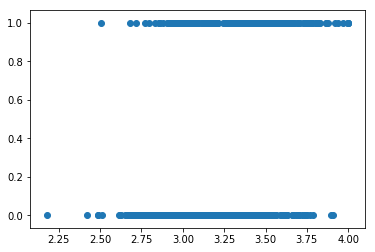

In [51]:
admissions = pd.read_csv("./dataset/admissions.csv")
plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

observation: this is not Linear relationship. because, of classification or categorical values. <br>
In LR, output is any real values and In Logistic, output is b/w 0 and 1. <br>
$\sigma(t)=\dfrac{e^t}{1+e^t} $ <br>
It has two parts: exp transformation, transforming all values to be +ve. <br>
And, Normalization transformation, transforming all values to range b/w 0 and 1. <br>


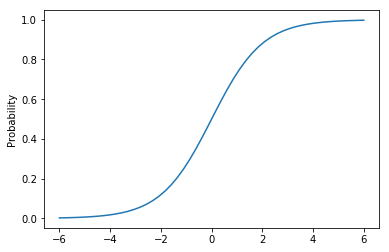

In [8]:
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

In [13]:

logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

#Ref: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

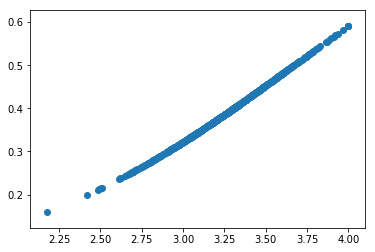

In [17]:
#Prob that the row should be labelled 0.
#Pron that the row should be labelled 1
pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
plt.scatter(admissions["gpa"], pred_probs[:,1])
plt.show()

Observation: Looks Linear relationship b/w the *gpa* values and Prob of admitted. Because, Logistic Regression is adapted version of Linear Regression for *Classification problems* and both are used to capture linear relationship b/w independent variables and dependent variables. <br>
Proof as below.<br>


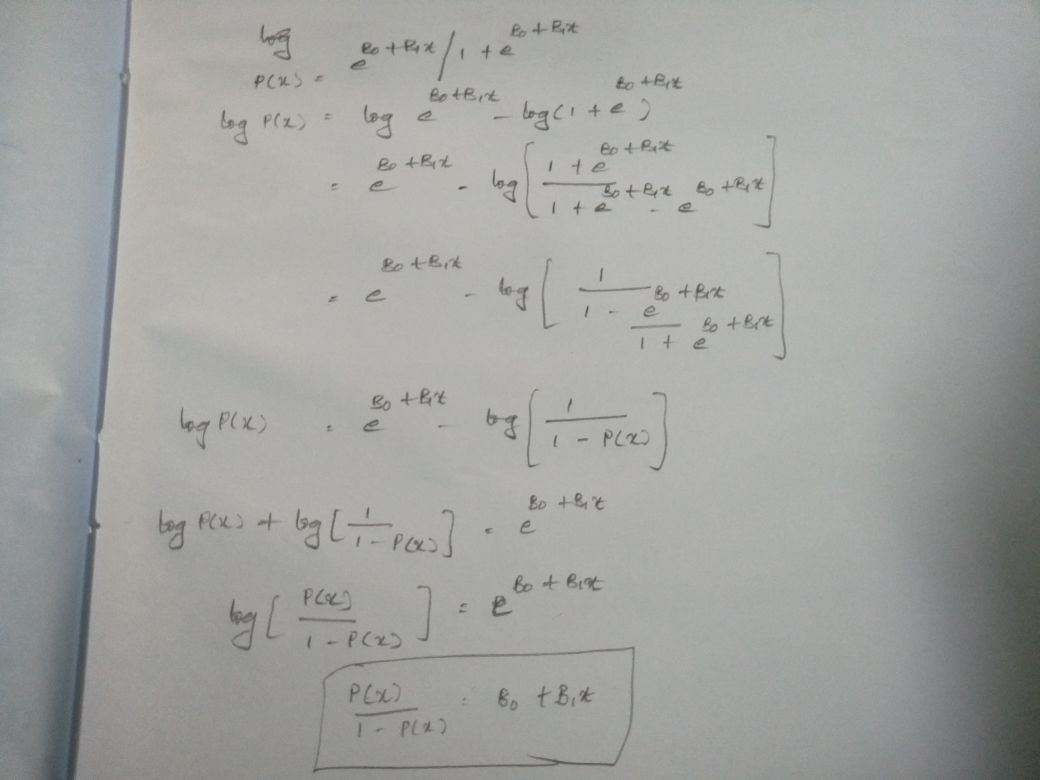

In [45]:
#Probabilities prediction can transfer into Binary values
from IPython.core.display import Image, display
display(Image('Logistic.jpg', width=320, unconfined=True))

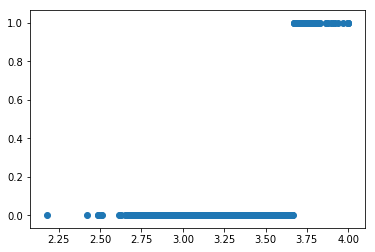

In [53]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
fitted_labels = logistic_model.predict(admissions[["gpa"]])
plt.scatter(admissions["gpa"], fitted_labels)
plt.show()

** Section 2: Evaluating Binary Classification ** <br>


In [21]:
model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])

labels = model.predict(admissions[["gpa"]])
admissions["predicted_label"] = labels
print(admissions["predicted_label"].value_counts())
print(admissions.head())

0    598
1     46
Name: predicted_label, dtype: int64
   admit       gpa         gre  predicted_label
0      0  3.177277  594.102992                0
1      0  3.412655  631.528607                0
2      0  2.728097  553.714399                0
3      0  3.093559  551.089985                0
4      0  3.141923  537.184894                0


what fraction of the predicted were correct ? <br>
$ Accuracy = \dfrac{\text{# of Correctly Predicted}}{\text{# of Observations}} $ <br>


In [24]:
#compare `predicted_label` with `admin` 
admissions["actual_label"] = admissions["admit"]
matches = admissions["predicted_label"] == admissions["actual_label"]
correct_predictions = admissions[matches]
print(correct_predictions.head())
accuracy = len(correct_predictions) / len(admissions)
print(accuracy)

   admit       gpa         gre  predicted_label  actual_label
0      0  3.177277  594.102992                0             0
1      0  3.412655  631.528607                0             0
2      0  2.728097  553.714399                0             0
3      0  3.093559  551.089985                0             0
4      0  3.141923  537.184894                0             0
0.6459627329192547


Observation: Accuracy is 64%. This won't helps for training model. This is simple accuracy. <br>
By Segementing a model's predictions into these different outcome categories. <br>
True Positive: Correctly predicted i.e student admitted or True. <br>
True Negative: Correctly predict i.e, student rejected correctly or True. <br>
False Positive: Incorrectly predicted or False. <br>
False Negative: Incorrectly predicted or False. <br>


In [28]:
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])

true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])

print(true_positives)
print(true_negatives)

31
385


Sensitivity or True Positive Rate: Correctly admitted.<br>
$ TPR=\dfrac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $<br>


In [31]:


sensitivity = true_positives / (true_positives + false_negatives)

print(sensitivity)

0.12704918032786885


Observation: Classification model is only catching 12.7% of +ve cases. <br>
Specificity or True -ve Rate: Correctly rejected.<br>
$ TNR=\dfrac{\text{True Negatives}}{\text{False Positives} + \text{True Negatives}} $ <br>

actual_label == 0 <br>

In [32]:
true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])
false_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 0)
false_positives = len(admissions[false_positive_filter])
specificity = (true_negatives) / (false_positives + true_negatives)
print(specificity)

0.9625


Observation: specificity of the model is *96%*. <br>
This gonna help to understanding classification model's performance. <br>

**Section 2: Multiclass Classification ** <br>

Goal: Predict the origin of the vehicle, either North America, Europe, or Asia from the car data set.<br>


In [12]:
import pandas as pd
cars = pd.read_csv("./dataset/auto.csv")
print(cars.head())
unique_regions = cars["origin"].unique()
print(unique_regions)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0  3504.0          12.0    70   
1  15.0          8         350.0       165.0  3693.0          11.5    70   
2  18.0          8         318.0       150.0  3436.0          11.0    70   
3  16.0          8         304.0       150.0  3433.0          12.0    70   
4  17.0          8         302.0       140.0  3449.0          10.5    70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  
[1 3 2]


In data, categorical variables exist in three columns: cylinders, year, and origin. So, use dummy variables.<br>
0 --> False <br>
1 --> True <br>


In [13]:
dummy_df = pd.get_dummies(cars["cylinders"], prefix="cyl")
dummy_df.head()

,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [14]:
dummy_cylinders = pd.get_dummies(cars["cylinders"], prefix="cyl")
cars = pd.concat([cars, dummy_cylinders], axis=1)
dummy_years = pd.get_dummies(cars["year"], prefix="year")
cars = pd.concat([cars, dummy_years], axis=1)
cars = cars.drop("year", axis=1)
cars = cars.drop("cylinders", axis=1)
print(cars.head())

    mpg  displacement  horsepower  weight  acceleration  origin  cyl_3  cyl_4  \
0  18.0         307.0       130.0  3504.0          12.0       1      0      0   
1  15.0         350.0       165.0  3693.0          11.5       1      0      0   
2  18.0         318.0       150.0  3436.0          11.0       1      0      0   
3  16.0         304.0       150.0  3433.0          12.0       1      0      0   
4  17.0         302.0       140.0  3449.0          10.5       1      0      0   

   cyl_5  cyl_6   ...     year_73  year_74  year_75  year_76  year_77  \
0      0      0   ...           0        0        0        0        0   
1      0      0   ...           0        0        0        0        0   
2      0      0   ...           0        0        0        0        0   
3      0      0   ...           0        0        0        0        0   
4      0      0   ...           0        0        0        0        0   

   year_78  year_79  year_80  year_81  year_82  
0        0        0      

In [15]:
#Split data into train(70%) and test(30%)
shuffled_rows = np.random.permutation(cars.index)
shuffled_cars = cars.iloc[shuffled_rows]
highest_train_row = int(cars.shape[0] * .70)
train = shuffled_cars.iloc[0:highest_train_row]
test = shuffled_cars.iloc[highest_train_row:]

In [18]:
#Train Logistic model for year,cylinders, origin
from sklearn.linear_model import LogisticRegression

unique_origins = cars["origin"].unique()
unique_origins.sort()

models = {}
features = [c for c in train.columns if c.startswith("cyl") or c.startswith("year")]

for origin in unique_origins:
    model = LogisticRegression()
    
    X_train = train[features]
    y_train = train["origin"] == origin

    model.fit(X_train, y_train)
    models[origin] = model

In [20]:
train.head()

,mpg,displacement,horsepower,weight,acceleration,origin,cyl_3,cyl_4,cyl_5,cyl_6,...,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
244,32.8,78.0,52.0,1985.0,19.4,3,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
94,12.0,455.0,225.0,4951.0,11.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
139,29.0,98.0,83.0,2219.0,16.5,2,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
224,20.5,231.0,105.0,3425.0,16.9,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
40,14.0,318.0,150.0,4096.0,13.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
testing_probs = pd.DataFrame(columns=unique_origins)
testing_probs = pd.DataFrame(columns=unique_origins)  

for origin in unique_origins:
    # Select testing features.
    X_test = test[features]   
    # Compute probability of observation being in the origin.
    testing_probs[origin] = models[origin].predict_proba(X_test)[:,1]

In [25]:
predicted_origins = testing_probs.idxmax(axis=1)
print(predicted_origins.head())

0    3
1    1
2    1
3    1
4    1
dtype: int64


**Section 3: Overfitting ** <br>

How to identify overfitting ? <br>
*Bias* and *variance* are error in a model. <br>
Bias: Error results in a bas descriptions while learning. Examples, Assuming that only one feature or missing important feature.This leads high in error rate.<br>
Variance: Error occurs due to variability's of a model's predicted values. Examples, In data set, 1000 features and using all variables to predict. This leads to complicated. Low bias but high variance. <br>
So, there is always a tradeoff.<br>
Ref: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff

In [31]:
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("./dataset/auto-mpg.data", delim_whitespace=True, names=columns)
filtered_cars = cars[cars['horsepower'] != '?']
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

In [32]:
def train_and_test(cols):
    # Split into features & target.
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    # Fit model.
    lr = LinearRegression()
    lr.fit(features, target)
    # Make predictions on training set.
    predictions = lr.predict(features)
    # Compute MSE and Variance.
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    variance = np.var(predictions)
    return(mse, variance)
    
cyl_mse, cyl_var = train_and_test(["cylinders"])
weight_mse, weight_var = train_and_test(["weight"])

In [34]:
one_mse, one_var = train_and_test(["cylinders"])
two_mse, two_var = train_and_test(["cylinders", "displacement"])
three_mse, three_var = train_and_test(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_test(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

print(one_mse,one_var)
print(two_mse, two_var)
print(three_mse, three_var)
print(four_mse, four_var)
print(five_mse, five_var)
print(six_mse, six_var)
print(seven_mse, seven_var)

24.02017956815553 36.74255887416017
21.282057055586364 39.480681386729316
20.25295483971423 40.50978360260148
17.76386057184385 42.998877870471865
17.76139610540622 43.00134233690939
11.590170981415227 49.17256746090048
10.847480945000454 49.915257497315146


Observation: Better at multivariate regression.<br>
Detect overfitting? Using in-sample error and out-of-sample error OR *Traing error with the test error* or *Cross Valdiation*. <br>
To calculate, outof-sample need seperate test dataset;

In [38]:
#Use KFold class to perform 10-fold validation using a random seed of 3 and calculate the mean squared error across all folds and the mean across all folds
def train_and_cross_val(cols):
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    
    variance_values = []
    mse_values = []
    
    # KFold instance.
    kf = KFold(n_splits=10, shuffle=True, random_state=3)
    
    # Iterate through over each fold.
    for train_index, test_index in kf.split(features):
        # Training and test sets.
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        # Fit the model and make predictions.
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        
        # Calculate mse and variance values for this fold.
        mse = mean_squared_error(y_test, predictions)
        var = np.var(predictions)

        # Append to arrays to do calculate overall average mse and variance values.
        variance_values.append(var)
        mse_values.append(mse)
   
    # Compute average mse and variance values.
        avg_mse = np.mean(mse_values)
        avg_var = np.mean(variance_values)
        return(avg_mse, avg_var)
        
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

In [39]:
print( two_mse, two_var)
print( three_mse, three_var )
print( four_mse, four_var )
print(five_mse, five_var )
print(six_mse, six_var )
print(seven_mse, seven_var )

18.29758046065182 35.956634898264156
17.76676555473918 37.074121456469264
15.196429975457331 47.16073595478817
15.205865303980422 47.26120965236267
11.206989929308786 52.35629897359422
11.74916420975936 55.26366603537349


Observation: MSE decreasing as more features.And variance of predictions increasing. This is due to sensitive to small variations in input values.<br>
Let's plot the error and variance to understand tradeoff while increasing the faetures.

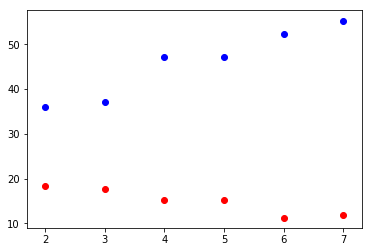

In [40]:
plt.scatter([2,3,4,5,6,7], [two_mse, three_mse, four_mse, five_mse, six_mse, seven_mse], c='red')
plt.scatter([2,3,4,5,6,7], [two_var, three_var, four_var, five_var, six_var, seven_var], c='blue')
plt.show()